### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import math

### Load data

In [2]:
path = '/Users/jooyong/github_locals/Soccer_Player_Recommendation_Service/data/match_details(from_Transfermarket)/Bundesliga_match_details/'
file_list = os.listdir(path)

Premier_matches = pd.DataFrame()
for file in file_list:

    filepath = path + file
    Premier_matches = pd.concat([Premier_matches, pd.read_json(filepath, lines=True)], axis=0)

In [3]:
Premier_matches.head(5)

,match_general_info,team_details,event_details
0,"{'day': 'Fri', 'date': '8/20/10', 'starttime':...","{'home': {'name': 'Bayern Munich', 'rank': '6'...","{'home': {'goal': [{'scorer': 'Thomas Müller',..."
1,"{'day': 'Sat', 'date': '8/21/10', 'starttime':...","{'home': {'name': 'TSG 1899 Hoffenheim', 'rank...","{'home': {'goal': [{'scorer': 'Demba Ba', 'goa..."
2,"{'day': 'Sat', 'date': '8/21/10', 'starttime':...","{'home': {'name': 'Borussia Mönchengladbach', ...",{'home': {'goal': [{'scorer': 'Mohamadou Idris...
3,"{'day': 'Sat', 'date': '8/21/10', 'starttime':...","{'home': {'name': '1.FC Köln', 'rank': '14', '...",{'home': {'goal': [{'scorer': 'Milivoje Novako...
4,"{'day': 'Sat', 'date': '8/21/10', 'starttime':...","{'home': {'name': 'SC Freiburg', 'rank': '15',...","{'home': {'goal': [{'scorer': 'Papiss Cissé', ..."


In [4]:
print('number of matches from season 2010-2011:', len(Premier_matches))

number of matches from season 2010-2011: 4005


### Match general information analysis
#### 1. Observe initial form

In [5]:
match_general_info = pd.DataFrame(Premier_matches['match_general_info'].to_list())

In [6]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score
0,Fri,8/20/10,8:30 PM,Allianz Arena,69.000,Thorsten Kinhöfer,2:1
1,Sat,8/21/10,3:30 PM,PreZero Arena,30.164,Günter Perl,4:1
2,Sat,8/21/10,3:30 PM,Stadion im Borussia-Park,42.202,Peter Gagelmann,1:1
3,Sat,8/21/10,3:30 PM,RheinEnergieSTADION,49.200,Dr. Felix Brych,1:3
4,Sat,8/21/10,3:30 PM,Dreisamstadion,24.000,Dr. Jochen Drees,1:3


In [7]:
for column in match_general_info.columns:

    print(column, match_general_info[column].isnull().sum())


day 0
date 0
starttime 0
stadium 0
attendance 373
referee 0
score 0


Attendance data need to be observed after converting string type date to datetype date to check why there are many null values.

#### 2. Data pre-processing

In [8]:
def home_score(row):
    try:
        temp = row.split(':')
        home = int(temp[0])
    except:
        home = row
    return home
def away_score(row):
    try:
        temp = row.split(':')
        away = int(temp[1])
    except:
        away = row
    return away

match_general_info['home_score'] = match_general_info['score'].apply(lambda x: home_score(x))
match_general_info['away_score'] = match_general_info['score'].apply(lambda x: away_score(x))

match_general_info['date'] = pd.to_datetime(match_general_info['date'])
match_general_info['starttime'] = pd.to_datetime(match_general_info['starttime']).apply(lambda x: datetime.time(x))

In [9]:
match_general_info.head(5)

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
0,Fri,2010-08-20,20:30:00,Allianz Arena,69.000,Thorsten Kinhöfer,2:1,2,1
1,Sat,2010-08-21,15:30:00,PreZero Arena,30.164,Günter Perl,4:1,4,1
2,Sat,2010-08-21,15:30:00,Stadion im Borussia-Park,42.202,Peter Gagelmann,1:1,1,1
3,Sat,2010-08-21,15:30:00,RheinEnergieSTADION,49.200,Dr. Felix Brych,1:3,1,3
4,Sat,2010-08-21,15:30:00,Dreisamstadion,24.000,Dr. Jochen Drees,1:3,1,3


In [10]:
# cases having null value for attendance
match_general_info[match_general_info['attendance'].isnull()]

,day,date,starttime,stadium,attendance,referee,score,home_score,away_score
2942,Wed,2020-03-11,18:30:00,Stadion im Borussia-Park,None,Deniz Aytekin,2:1,2,1
2969,Wed,2020-06-03,20:30:00,Wohninvest-Weserstadion,None,Patrick Ittrich,0:3,0,3
2979,Sat,2020-05-16,15:30:00,SIGNAL IDUNA PARK,None,Deniz Aytekin,4:0,4,0
2980,Sat,2020-05-16,15:30:00,Red Bull Arena,None,Manuel Gräfe,1:1,1,1
2981,Sat,2020-05-16,15:30:00,PreZero Arena,None,Christian Dingert,0:3,0,3
...,...,...,...,...,...,...,...,...,...
3524,Sat,2022-01-08,15:30:00,Sportpark Ronhof | Thomas Sommer,None,Dr. Felix Brych,0:0,0,0
3527,Sun,2022-01-09,17:30:00,Vonovia Ruhrstadion,None,Daniel Schlager,1:0,1,0
3535,Sun,2022-01-16,15:30:00,WWK ARENA,None,Sven Jablonski,1:1,1,1
3542,Sat,2022-01-22,15:30:00,Sportpark Ronhof | Thomas Sommer,None,Robert Schröder,2:1,2,1


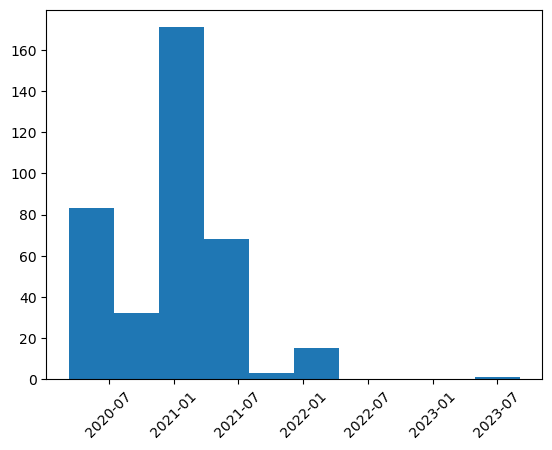

In [11]:
plt.hist(match_general_info[match_general_info['attendance'].isnull()]['date'])
plt.xticks(rotation = 45)
plt.show()

Most of null cases for the attendance locate season 2020-2021, and it could be because of the pendemic. <br>
There were many games with no attendance during the pendamic, so 0 will replace null values for attendance. <br>
For other cases, average number of attendance for the stadium will replace null values.

In [12]:
match_general_info.loc[match_general_info['date']<='2021-07-01', 'attendance'] = match_general_info[match_general_info['date']<='2021-07-01']['attendance'].fillna('0')

In [13]:
match_general_info[match_general_info['attendance'].isnull()][['date', 'stadium']]

,date,stadium
3482,2021-11-28,Red Bull Arena
3485,2021-12-04,PreZero Arena
3487,2021-12-04,WWK ARENA
3493,2021-12-11,Allianz Arena
3494,2021-12-11,Red Bull Arena
3499,2021-12-12,Sportpark Ronhof | Thomas Sommer
3501,2021-12-14,MHPArena Stuttgart
3509,2021-12-15,WWK ARENA
3510,2021-12-17,Allianz Arena
3511,2021-12-18,Red Bull Arena


In [14]:
# save indices for missing attendance samples to later check
attendance_missing_index = match_general_info[match_general_info['attendance'].isnull()].index

for stadium in set(match_general_info[match_general_info['attendance'].isnull()]['stadium']):

    average = pd.to_numeric(match_general_info[match_general_info['stadium']==stadium]['attendance'].dropna().apply(lambda x: x.replace('.', ''))).mean()
    if math.isnan(average)!=True:
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(str(round(average)))
    
    else:
        # max capacity of Kenilworth Road stadium is 11500, so I am going to use 10000.(because nothing left after drop null value)
        match_general_info.loc[match_general_info['stadium']==stadium,'attendance'] = match_general_info[match_general_info['stadium']==stadium]['attendance'].fillna(str(11500)) 

match_general_info['attendance'] = pd.to_numeric(match_general_info['attendance'].apply(lambda x: x.replace('.', ''))).apply(lambda x: round(x))

In [15]:
# to check missing attendances are filled out or not
for one_index in attendance_missing_index:
    print(match_general_info.loc[one_index]['date'].date(), match_general_info.loc[one_index]['attendance'])

2021-11-28 32182
2021-12-04 23778
2021-12-04 25039
2021-12-11 63868
2021-12-11 32182
2021-12-12 13848
2021-12-14 44206
2021-12-15 25039
2021-12-17 63868
2021-12-18 32182
2021-12-18 13848
2022-01-07 63868
2022-01-08 32182
2022-01-08 25084
2022-01-08 13848
2022-01-09 21233
2022-01-16 25039
2022-01-22 13848
2023-09-03 13180


In [16]:
for column in match_general_info.columns:
    print(column, match_general_info[column].isnull().sum())

day 0
date 0
starttime 0
stadium 0
attendance 0
referee 0
score 0
home_score 0
away_score 0


#### 3. Data Quality Check - Check if there are inappropriate values
##### - categorical data

In [17]:
match_general_info.describe(include=['object'])

,day,starttime,stadium,referee,score
count,4005,4005,4005,4005,4005
unique,7,32,33,45,49
top,Sat,15:30:00,BayArena,Dr. Felix Brych,1:1
freq,2530,2497,223,231,466


In [18]:
match_general_info.describe(include=['datetime'], datetime_is_numeric=True)

,date
count,4005
mean,2017-01-22 02:56:53.932584192
min,2010-08-20 00:00:00
25%,2013-10-26 00:00:00
50%,2017-02-04 00:00:00
75%,2020-05-27 00:00:00
max,2023-09-03 00:00:00


In [19]:
match_general_info['day'].value_counts(dropna=False)

Sat    2530
Sun     838
Fri     367
Wed     140
Tue     103
Mon      24
Thu       3
Name: day, dtype: int64

In [20]:
match_general_info['date'].value_counts(dropna=False)

2015-05-16    9
2018-05-12    9
2019-05-18    9
2022-05-14    9
2016-05-07    9
             ..
2019-11-29    1
2014-11-07    1
2019-11-22    1
2014-11-28    1
2010-08-20    1
Name: date, Length: 1266, dtype: int64

In [21]:
match_general_info['starttime'].value_counts(dropna=False)

15:30:00    2497
20:30:00     477
18:30:00     409
17:30:00     285
20:00:00     117
18:00:00     117
19:30:00      23
13:30:00      19
15:31:00      14
15:32:00       9
15:45:00       4
20:40:00       4
20:31:00       3
20:32:00       3
20:45:00       3
18:32:00       2
15:33:00       2
15:40:00       2
17:45:00       2
20:15:00       1
20:03:00       1
17:31:00       1
18:31:00       1
17:32:00       1
20:02:00       1
17:40:00       1
18:02:00       1
15:35:00       1
18:45:00       1
14:00:00       1
20:36:00       1
18:03:00       1
Name: starttime, dtype: int64

In [22]:
match_general_info['stadium'].value_counts(dropna=False)

BayArena                            223
SIGNAL IDUNA PARK                   223
Stadion im Borussia-Park            223
PreZero Arena                       223
Volkswagen Arena                    222
Allianz Arena                       222
WWK ARENA                           206
Wohninvest-Weserstadion             206
Commerzbank Arena                   206
Mewa Arena                          205
Veltins-Arena                       204
MHPArena Stuttgart                  189
Olympiastadion Berlin               187
Dreisamstadion                      173
RheinEnergieSTADION                 171
Volksparkstadion                    136
Heinz-von-Heiden-Arena              136
Red Bull Arena                      120
Max-Morlock-Stadion                  85
Stadion An der Alten Försterei       70
MERKUR SPIEL-ARENA                   51
Vonovia Ruhrstadion                  35
Merck-Stadion am Böllenfalltor       35
Home Deluxe Arena                    34
SchücoArena                          34


In [23]:
match_general_info['referee'].value_counts(dropna=False)

Dr. Felix Brych            231
Felix Zwayer               205
Deniz Aytekin              198
Manuel Gräfe               188
Marco Fritz                188
Christian Dingert          173
Tobias Stieler             165
Daniel Siebert             155
Bastian Dankert            148
Robert Hartmann            143
Guido Winkmann             138
Markus Schmidt             130
Sascha Stegemann           130
Tobias Welz                123
Wolfgang Stark             123
Günter Perl                104
Knut Kircher               101
Florian Meyer              100
Harm Osmers                 94
Thorsten Kinhöfer           82
Peter Gagelmann             82
Frank Willenborg            79
Sven Jablonski              79
Peter Sippel                78
Dr. Jochen Drees            78
Benjamin Cortus             75
Patrick Ittrich             72
Michael Weiner              72
Robert Schröder             65
Daniel Schlager             63
Martin Petersen             59
Benjamin Brand              54
Florian 

##### - numerical data


In [24]:
match_general_info.describe()

,attendance,home_score,away_score
count,4005.000000,4005.000000,4005.000000
mean,37448.248939,1.680649,1.311361
std,21059.477085,1.381568,1.224208
min,0.000000,0.000000,0.000000
25%,24119.000000,1.000000,0.000000
50%,36190.000000,1.000000,1.000000
75%,51000.000000,2.000000,2.000000
max,81365.000000,9.000000,8.000000
